# Frequência e Exclusividade do Termo (TF-IDF)
Este estudo propõe a contrução do cálculo de `TF-IDF` manualmente a fim de entender todo o processo que o compõe.

Mas o que diabos é `TF-IDF`?

TF-IDF é uma estatística que faz alusão a identificação de palavras chave que representem algum texto. Tome como exemplo a música Anunciação de Alceu Valença. Apenas do nome, sempre lembraremos da música pelos termos `TU` e `VENS`! É isso que vamos tentar abordar neste estudo. Tentar entender o quão exclusivo alguns termos são a cada música e tentar identificá-las desta forma.

Para facilitar o entendimento vou usar algumas músicas populares e que você provávelmente já ouviu no seu streaming (ou no rádio).

# Instalações

In [35]:
#pip install wordcloud

# Imports

In [45]:
import pandas as pd
import numpy as np
import os

#import collections

from sklearn.feature_extraction.text import TfidfVectorizer
import math

import nltk
nltk.download('stopwords')

_stopwords = nltk.corpus.stopwords.words('portuguese')

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Músicas
Lista somente os arquivos das músicas no diretório `dados`

In [2]:
_arquivos_musicas = [_arq for _arq in os.listdir("dados/") if str(_arq).endswith(".txt")]

In [3]:
_arquivos_musicas[0]

'samurai.txt'

# Leitura e tratamento das letras das músicas
Junta todas as linhas em `uma só string`, remove os `pulos de linha`, coloca tudo em `letra minúscula` e cria um `array de palavras`.

In [4]:
def _f_cleansing_letra_musica(
    _p_letra: list
) -> str:
    
    _termos = {
        "\n": "",
        "\t": " ",
        "(": "",
        ")": "",
        ",": ""
    }
    
    _letra = " ".join(_p_letra).lower()
    
    for _termo, _substituto in _termos.items():
        _letra = _letra.replace(
            _termo, _substituto
        )
    
    return _letra.split(" ")

In [5]:
_musicas = []

for _arquivo_musica in _arquivos_musicas:
    with open("dados/" + _arquivo_musica) as _o_arquivo_musica:
        _musicas.append({
            "musica": _arquivo_musica.replace(".txt", "").replace("-", " "),
            "letra": _f_cleansing_letra_musica(_o_arquivo_musica.readlines())
        })

_df_musicas = pd.DataFrame(_musicas)
_df_musicas

,musica,letra
0,samurai,"[ai, quanto, querer, cabe, em, meu, coração, a..."
1,morena tropicana,"[da, manga, rosa, quero, o, gosto, e, o, sumo,..."
2,anunciacao,"[na, bruma, leve, das, paixões, que, vêm, de, ..."
3,sabia,"[a, todo, mundo, eu, dou, psiu, psiu, psiu, ps..."


# Saco de Palavras (BAG OF WORDS)
No primeiro bloco criamos um `bag of words global`, onde teremos uma `lista de palavras distinstas` contidas em todas as letras `conhecidas`.

Já no segundo bloco criamos uma `bag of words` para `cada música`.

In [6]:
_bag_of_words = sorted(list(set(
    [_palavra for _letra in _df_musicas["letra"].values.flatten() for _palavra in _letra]
)))
_bag_of_words[:10]

['a', 'afaga', 'ah', 'ai', 'alivia', 'amor', 'anda', 'anjo', 'anuncio', 'ao']

In [7]:
_df_musicas["bag_of_words"] = _df_musicas["letra"].apply(
    lambda _letra:
        list(set(_letra))
)

_df_musicas

,musica,letra,bag_of_words
0,samurai,"[ai, quanto, querer, cabe, em, meu, coração, a...","[iluminar, caí, quis, traz, me, amor, mas, não..."
1,morena tropicana,"[da, manga, rosa, quero, o, gosto, e, o, sumo,...","[travoso, melão, temporana, é, de, gosto, vem,..."
2,anunciacao,"[na, bruma, leve, das, paixões, que, vêm, de, ...","[roupas, de, varal, já, te, anuncio, virias, l..."
3,sabia,"[a, todo, mundo, eu, dou, psiu, psiu, psiu, ps...","[fala, tendo, vem, cá, já, passarinhos, favor,..."


# Frequência das Palavras por Música (NUM OF WORDS)
Abaixo temos uma `função` que ajudará a criar uma `Bag of Words` com as frequências de cada palavra em `cada letra` de música, usando o `layout` de `Bag of Words` criado com `todas as palavras de todas as músicas`.

In [8]:
def _f_gera_bag_of_words_letra(
    _p_bag_of_words: list,
    _p_letra: list
) -> dict:
    _bag_of_words_letra = dict.fromkeys(_p_bag_of_words, 0)
    
    for _palavra in _p_letra:
        _bag_of_words_letra[_palavra] += 1
    
    return _bag_of_words_letra

In [9]:
_df_musicas["freq_palavras"] = _df_musicas["letra"].apply(
    lambda _letra: _f_gera_bag_of_words_letra(
        _bag_of_words,
        _letra
    )
)

_df_musicas

,musica,letra,bag_of_words,freq_palavras
0,samurai,"[ai, quanto, querer, cabe, em, meu, coração, a...","[iluminar, caí, quis, traz, me, amor, mas, não...","{'a': 2, 'afaga': 2, 'ah': 0, 'ai': 4, 'alivia..."
1,morena tropicana,"[da, manga, rosa, quero, o, gosto, e, o, sumo,...","[travoso, melão, temporana, é, de, gosto, vem,...","{'a': 0, 'afaga': 0, 'ah': 0, 'ai': 36, 'alivi..."
2,anunciacao,"[na, bruma, leve, das, paixões, que, vêm, de, ...","[roupas, de, varal, já, te, anuncio, virias, l...","{'a': 2, 'afaga': 0, 'ah': 60, 'ai': 0, 'alivi..."
3,sabia,"[a, todo, mundo, eu, dou, psiu, psiu, psiu, ps...","[fala, tendo, vem, cá, já, passarinhos, favor,...","{'a': 8, 'afaga': 0, 'ah': 0, 'ai': 0, 'alivia..."


# Term Frequency (TF)
Esta técnica permite avaliar o `quanto cada palavra repete dentro de uma letra`. Ou seja, o quanto esta palavra `pode`, eu digo `pode`, ser `importante` para a `letra da música`.

In [10]:
def _f_tf(
    _p_freq_palavras: dict, #numOfWords
    _p_letra: list          #bagOfWords
) -> dict:
    _tf = {}
    _len = len(_p_letra) #bagOfWordsCount
    
    for _palavra, _frequencia in _p_freq_palavras.items():
        _tf[_palavra] = _frequencia / float(_len)
    
    return _tf

In [11]:
_df_musicas["tf"] = _df_musicas.apply(
    lambda _musica:
        _f_tf(
            _musica["freq_palavras"],
            _musica["bag_of_words"]
        ), axis=1
)

_df_musicas

,musica,letra,bag_of_words,freq_palavras,tf
0,samurai,"[ai, quanto, querer, cabe, em, meu, coração, a...","[iluminar, caí, quis, traz, me, amor, mas, não...","{'a': 2, 'afaga': 2, 'ah': 0, 'ai': 4, 'alivia...","{'a': 0.03225806451612903, 'afaga': 0.03225806..."
1,morena tropicana,"[da, manga, rosa, quero, o, gosto, e, o, sumo,...","[travoso, melão, temporana, é, de, gosto, vem,...","{'a': 0, 'afaga': 0, 'ah': 0, 'ai': 36, 'alivi...","{'a': 0.0, 'afaga': 0.0, 'ah': 0.0, 'ai': 0.72..."
2,anunciacao,"[na, bruma, leve, das, paixões, que, vêm, de, ...","[roupas, de, varal, já, te, anuncio, virias, l...","{'a': 2, 'afaga': 0, 'ah': 60, 'ai': 0, 'alivi...","{'a': 0.03636363636363636, 'afaga': 0.0, 'ah':..."
3,sabia,"[a, todo, mundo, eu, dou, psiu, psiu, psiu, ps...","[fala, tendo, vem, cá, já, passarinhos, favor,...","{'a': 8, 'afaga': 0, 'ah': 0, 'ai': 0, 'alivia...","{'a': 0.19047619047619047, 'afaga': 0.0, 'ah':..."


# Inverse Data Frequency (IDF)
Agora vamos aplicar uma técnica que verifica `o quanto a palavra é exclusiva` dentre `todas as letras de músicas`. Ou seja, o quão `rara` é a palavra.

In [12]:
def _f_idf(
    _p_freq_palavras_musicas: pd.Series
):
    _n = len(_p_freq_palavras_musicas)
    
    _freq_palavras_global = dict.fromkeys(_p_freq_palavras_musicas[0].keys(), 0)
    
    for _freq_palavras_musica in _p_freq_palavras_musicas:
        for _palavra, _freq in _freq_palavras_musica.items():
            if _freq > 0:
                _freq_palavras_global[_palavra] += 1
    
    for _palavra, _freq in _freq_palavras_global.items():
        _freq_palavras_global[_palavra] = math.log(_n / float(_freq))
    
    return _freq_palavras_global

In [13]:
_idf = _f_idf(_df_musicas["freq_palavras"])

# TF-IDF
O índice `TF-IDF` por fim é calculado `multiplicando-se` o coeficiente de `TF de cada palavra` em cada música em relação ao coeficiente `IDF` dessa `palavra`.

In [14]:
def _f_tf_idf(
    _p_tf: dict,
    _p_idf: dict
):
    _tf_idf = {}
    for _palavra, _freq in _p_tf.items():
        _tf_idf[_palavra] = _freq * _p_idf[_palavra]
    
    return _tf_idf

In [15]:
_df_musicas["tf_idf"] = _df_musicas["tf"].apply(
    lambda _tf: 
        _f_tf_idf(
            _tf,
            _idf
        )
)

_df_musicas

,musica,letra,bag_of_words,freq_palavras,tf,tf_idf
0,samurai,"[ai, quanto, querer, cabe, em, meu, coração, a...","[iluminar, caí, quis, traz, me, amor, mas, não...","{'a': 2, 'afaga': 2, 'ah': 0, 'ai': 4, 'alivia...","{'a': 0.03225806451612903, 'afaga': 0.03225806...","{'a': 0.009280066853283253, 'afaga': 0.0447191..."
1,morena tropicana,"[da, manga, rosa, quero, o, gosto, e, o, sumo,...","[travoso, melão, temporana, é, de, gosto, vem,...","{'a': 0, 'afaga': 0, 'ah': 0, 'ai': 36, 'alivi...","{'a': 0.0, 'afaga': 0.0, 'ah': 0.0, 'ai': 0.72...","{'a': 0.0, 'afaga': 0.0, 'ah': 0.0, 'ai': 0.49..."
2,anunciacao,"[na, bruma, leve, das, paixões, que, vêm, de, ...","[roupas, de, varal, já, te, anuncio, virias, l...","{'a': 2, 'afaga': 0, 'ah': 60, 'ai': 0, 'alivi...","{'a': 0.03636363636363636, 'afaga': 0.0, 'ah':...","{'a': 0.010461166270973848, 'afaga': 0.0, 'ah'..."
3,sabia,"[a, todo, mundo, eu, dou, psiu, psiu, psiu, ps...","[fala, tendo, vem, cá, já, passarinhos, favor,...","{'a': 8, 'afaga': 0, 'ah': 0, 'ai': 0, 'alivia...","{'a': 0.19047619047619047, 'afaga': 0.0, 'ah':...","{'a': 0.054796585228910635, 'afaga': 0.0, 'ah'..."


# Análise dos Resultados
Neste ponto toda a parte de coeficientes já está pronta. Nos resta observar os resultados e tirar as conclusões.

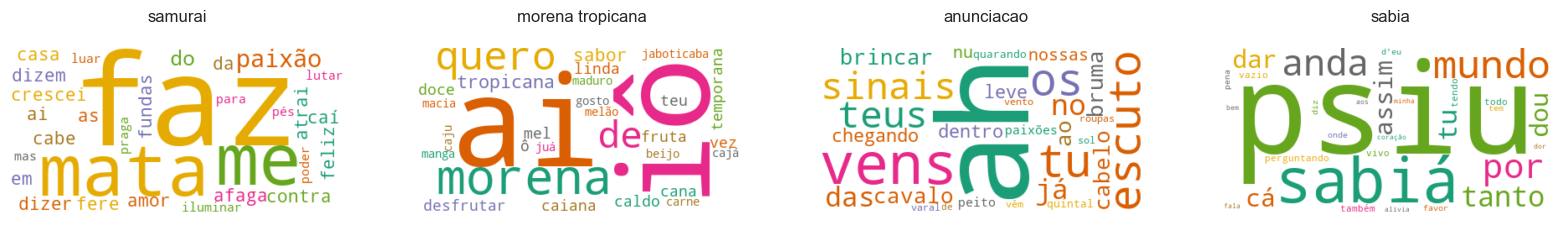

In [91]:
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

_musicas_tf_idf = _df_musicas.set_index('musica')["tf_idf"].to_dict()

_wc_musicas_tf_idf = wordcloud.WordCloud(
    background_color="white", 
    #mask=mask, 
    contour_width=0.1, 
    contour_color="lightgrey", 
    max_font_size=150, 
    max_words=30,
    random_state=42,
    colormap="Dark2"
)

for _i, _musica_tf_idf in enumerate(_musicas_tf_idf.items()):
    _musica = _musica_tf_idf[0]
    _tf_idf = _musica_tf_idf[1]
    
    _wc_musicas_tf_idf.generate_from_frequencies(_tf_idf)   
    plt.subplot(len(_musicas_tf_idf), 4, _i+1)
    plt.imshow(_wc_musicas_tf_idf, interpolation="bilinear")
    plt.axis("off")
    plt.title(_musica + "\n")
plt.show()